## 目标
定义简单的神经网络架构，数据处理，指定损失函数和如何训练模型

### 线性回归
1. 线性模型
回归是能够为一个或者多个自变量和因变量之间关系建模的方法，表示输出和输入之间的关系。     
线性回归，自变量x和因变量y之间是线性的关系，y可以表示为x中元素的加权和,并且假设噪声遵循正态分布。     
仿射变换的特点是通过加权和对特征进行线性变换，并通过偏置项来进行平移        
方程表示： $\hat{y}=Xw+b$        
寻找模型参数$w$
 - 模型质量的度量方式
 - 更新模型以提高模型预测质量方法


2. 损失函数
损失函数能够量化目标的实际值与预测值之间的差距，使用非负数作为损失，数值越小表示损失越小，回归问题中通常使用平方误差函数，公式
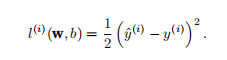
由于平方误差函数中的二次方项，
估计值$\hat{y}^{(i)}$和观测值$y^{(i)}$之间较大的差异将导致更大的损失。
为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）。

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

在训练模型时，我们希望寻找一组参数（$\mathbf{w}^*, b^*$），
这组参数能最小化在所有训练样本上的总损失。如下式：

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

### 随机梯度下降
在无法得到解析解的时候，使用随机梯度下降的方法，优化深度学习模型。随机梯度下降方法通过不断地在损失函数递减的方向上更新参数来降低误差。其最简单的方法就是计算损失函数对于模型参数的导数，但每次更新的时候需要遍历整个数据集，因此在计算更新的时候随机抽取一小批样本，小批量随机梯度下降      
步骤：    
1. 初始化模型参数的值，基本用随机初始化
2. 从数据集中选取小批量样本，在负梯度的方向上进行更新
3. 不断迭代步骤2， 更新参数     
$$\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}$$     
$\mathbf{w}$和$\mathbf{x}$都是向量。
在这里，更优雅的向量表示法比系数表示法（如$w_1, w_2, \ldots, w_d$）更具可读性。
$|\mathcal{B}|$表示每个小批量中的样本数，这也称为*批量大小*（batch size）。
 - 超参数： $\eta$表示*学习率*（learning rate）。
批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。
这些可以调整但不在训练过程中更新的参数称为*超参数*（hyperparameter）。
 - *调参*（hyperparameter tuning）是选择超参数的过程。
超参数通常是我们根据训练迭代结果来调整的，
而训练迭代结果是在独立的*验证数据集*（validation dataset）上评估得到的。
4. 训练若干次后（或者满足停止的条件时候），记录下模型的参数估计值

### 矢量化加速
在训练模型时希望能够同时处理整个小批量样本，利用线性代数库，对计算进行矢量化，规避python的for循环

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch

In [2]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [4]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [5]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.12968 sec'

In [6]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00100 sec'

### 正态分布与平方损失

In [10]:
import numpy as np
import matplotlib.pyplot as plt
def normal(x,mu,sigma):
    p = 1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-0.5/sigma**2*(x-mu)**2)

In [18]:
x= np.arange(-7,7,0.01)
param =[(0,1),(0,2),(3,2)]
df = [normal(x,mu,sigma) for mu,sigma in param]
df

[array([9.13472041e-12, 9.79657253e-12, 1.05053283e-11, ...,
        1.12642341e-11, 1.05053283e-11, 9.79657253e-12]),
 array([0.00043634, 0.00044404, 0.00045186, ..., 0.00045981, 0.00045186,
        0.00044404]),
 array([7.43359757e-07, 7.62168472e-07, 7.81433554e-07, ...,
        2.78144888e-02, 2.75394512e-02, 2.72664515e-02])]

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 65292 missing from current font.
  font.set_text(s, 0, flags=flags)


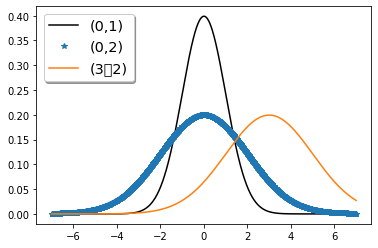

In [19]:
fig,ax = plt.subplots()
ax.plot(x,df[0],'k',label='(0,1)')
ax.plot(x,df[1],'*',label='(0,2)')
ax.plot(x,df[2],'-',label='(3，2)')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

正态分布，改变均值会产生x轴偏移，增加方差会分散分布，降低峰值

极大似然估计法选择估计量称为极大似然估计，最大似然对数来简化，优化通常是说最小化，对数似然公式：         
$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.$$

假设$\sigma$ 是个常数，就可忽略第一项，因为不依赖于$w$和$b$，因此简化上述方程，就得到线性函数的优化公式。
$$loss = \frac{1}{2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2$$

 ## 练习

1. 假设我们有一些数据$x_1, \ldots, x_n \in \mathbb{R}$。我们的目标是找到一个常数$b$，使得最小化$\sum_i (x_i - b)^2$。
    1. 找到最优值$b$的解析解。
    1. 这个问题及其解与正态分布有什么关系?
1. 推导出使用平方误差的线性回归优化问题的解析解。为了简化问题，可以忽略偏置$b$（我们可以通过向$\mathbf X$添加所有值为1的一列来做到这一点）。
    1. 用矩阵和向量表示法写出优化问题（将所有数据视为单个矩阵，将所有目标值视为单个向量）。
    1. 计算损失对$w$的梯度。
    1. 通过将梯度设为0、求解矩阵方程来找到解析解。
    1. 什么时候可能比使用随机梯度下降更好？这种方法何时会失效？
1. 假定控制附加噪声$\epsilon$的噪声模型是指数分布。也就是说，$p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$
    1. 写出模型$-\log P(\mathbf y \mid \mathbf X)$下数据的负对数似然。
    1. 请试着写出解析解。
    1. 提出一种随机梯度下降算法来解决这个问题。哪里可能出错？（提示：当我们不断更新参数时，在驻点附近会发生什么情况）请尝试解决这个问题。
